# Linear Regression with Scikit-Learn

This notebook demonstrates regression using the Linear Regression algorithm from scikit-learn on the California Housing dataset.

## 1. Introduction
We will build, train, and evaluate a Linear Regression model to predict median house values.

## 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

## 3. Load and Prepare Data

In [2]:
# Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train Linear Regression Model

In [3]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## 5. Evaluate Model

In [4]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Display coefficients
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coeff_df)

Mean Squared Error: 0.531
R^2 Score: 0.596

Coefficients:
            Coefficient
MedInc         0.849222
HouseAge       0.122119
AveRooms      -0.299558
AveBedrms      0.348410
Population    -0.000884
AveOccup      -0.041698
Latitude      -0.893856
Longitude     -0.868617


## 6. Visualization

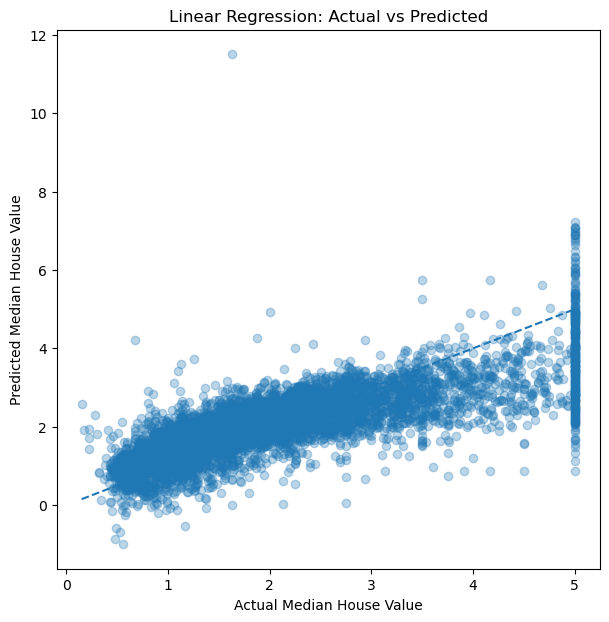

In [5]:
# Predicted vs Actual
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

## 7. Conclusion
The Linear Regression model shows how well a simple model can predict housing prices. Review MSE and R^2 to gauge performance and consider regularization for improvement.